<a href="https://colab.research.google.com/github/zhouchun0105/Fake-News-Detection-Project-BA865/blob/main/FINAL_NOTEBOOK_BA865_Fake_News_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%html
<marquee style='width: 40%; color: red;'><b>Welcome to exploring Fake News Classification!</b></marquee>

# **BA865 - Introduction to Neural Networks**
## Group Project

*Alex von Schwerdtner, Subhiksha Sivasubramanian, Chun Zhou, Geech Hor*

<img src="https://github.com/zhouchun0105/Fake-News-Detection-Project-BA865/blob/main/Fake_News.png?raw=true" width="800" align="center"/>



** Image from [Boston University College of Communication](https://sites.bu.edu/cmcs/2018/11/26/fake-news-social-media-and-politics/)*

---
# **Fake News Classification**
---

### *Executive Summary*
*Fake News* is false or misleading information presented as news. Fake news often has the aim of damaging the reputation of a person or entity, or making money through advertising revenue. The prevalence of fake news has increased with the rise of social media. Fake news can reduce the impact of real news by competing with it and makes it harder for people to see the truth and can be harmful to your health. Scientists have dedicated efforts to apply AI techniques to aid detecting and removing fake news.



### *Problem definition:*

> **Is the news that we read day to day on different digital platforms true every time?**

We would like to use deep learning techniques and AI to automate the detection of Fake News by creating a neural network algorithm and machine learning models to classify and remove false news from companies' platforms. 

## **Data**

The Data was downloaded from [ISOT Fake News Dataset]('https://www.uvic.ca/ecs/ece/isot/datasets/fake-news/index.php?utm_medium=redirect&utm_source=/engineering/ece/isot/datasets/fake-news/index.php&utm_campaign=redirect-usage')

>*The dataset contains two types of articles: fake and real News. This dataset was collected from real-world sources; the truthful articles were obtained by crawling articles from Reuters.com (News website). As for the fake news articles, they were collected from different sources. The fake news articles were collected from unreliable websites that were flagged by Politifact (a fact-checking organization in the USA) and Wikipedia. The dataset contains different types of articles on different topics, however, the majority of articles focus on political and World news topics.*

>*The dataset consists of two CSV files. The first file named “True.csv'' contains more than 12,600 articles from reuter.com. The second file named “Fake.csv '' contains more than 12,600 articles from different fake news outlet resources. Each article contains the following information: article title, text, type and the date the article was published on. To match the fake news data collected for kaggle.com, we focused mostly on collecting articles from 2016 to 2017. The data collected were cleaned and processed, however, the punctuations and mistakes that existed in the fake news were kept in the text.*


---
## **Basic information of Datasets used**:

*Real News Dataset*
* contains 21417  articles

*Fake News Dataset*
* contains 23,481  articles from different fake news outlet sources. 

Each row represents a real or fake news article including: the subject of the article and the date the article was published.

* **Title**: Title of the Article
* **Text**: Text of the Article
* **Content**: Title and Text Combined
* **Subject**: Subject of the Article
* **Date**: Date the Article was published on
* **Real/Fake (1,0)**: Label variable 1 = Real Article, 0 = Fake Article




## Content
---

1.  **Importing Libraries**
2.  **Setup, Data Cleaning & Data Pre-Processing**
3.  **Exploratory Data Analysis**
4.   **Neural Networks**
*   *Embedding using stemming*
*   *Embedding using Text vectorization*
*   *Multi Input Embedding*
* *Shaply (feature importance)*
5.   **Conclusion**
---


# **1. Import libraries**

In [1]:
# Importing all necessary libraries and imports

# Basics
import numpy as np
from numpy import array
from numpy import asarray
from numpy import zeros
import pandas as pd
from collections import Counter
embeddings_dictionary = dict()

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.models import Model
from keras.utils.vis_utils import plot_model


# sklearn
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


# NLTK 
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


try:
    from scikeras.wrappers import KerasRegressor                     
except ImportError:
    !pip install scikeras
    from scikeras.wrappers import KerasRegressor

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.2
    Uninstalling importlib-metadata-4.11.2:
      Successfully uninstalled importlib-metadata-4.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


# **2. Setup, Data Cleaning & Pre-Processing**

In [2]:
# Mounting Google Drive locally
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
# Import data 
df_fakenews_true = pd.read_csv("gdrive/Shared drives/BA865 Group Project/News _dataset/True.csv")
df_fakenews_fake = pd.read_csv("gdrive/Shared drives/BA865 Group Project/News _dataset/Fake.csv")

In [4]:
df_fakenews_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
df_fakenews_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
df_fakenews_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
df_fakenews_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
print(df_fakenews_true.shape)
print(df_fakenews_fake.shape)

(21417, 4)
(23481, 4)


In [9]:
# checking for any null values
df_fakenews_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [10]:
# checking for any null values
df_fakenews_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

## 2.1 Data Pre-Processing

In [11]:
# creating new colum 'Real/Fake', labeling the two datasets in order to merge and know which observation is real and which one is false
df_fakenews_true['real/fake'] = '1'
df_fakenews_fake['real/fake'] = '0'

In [12]:
# merging the two datasets
frames = [df_fakenews_true, df_fakenews_fake]
news_data_all = pd.concat(frames)

In [13]:
# Removing all links and the headline from the date column
news_data_all = news_data_all[news_data_all.date.str.contains('Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec')]

In [14]:
# Converting the Date Column to a different Datetime format for our EDA
news_data_all['date'] = pd.to_datetime(news_data_all['date']).dt.date

In [15]:
news_data_all.head()

,title,text,subject,date,real/fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,1


In [16]:
# Keeping the subject column in the 'news_data_all' dataframe for EDA before dropping
news_data = news_data_all

In [17]:
# merging the title and news text
news_data['content'] = news_data['title']+' '+news_data['text']
news_dataset = news_data[['real/fake', 'date', 'content', 'title', 'text']]

In [18]:
# casting the label column as an integer
news_dataset['real/fake'] = news_dataset['real/fake'].astype(int)

In [19]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44888 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   real/fake  44888 non-null  int64 
 1   date       44888 non-null  object
 2   content    44888 non-null  object
 3   title      44888 non-null  object
 4   text       44888 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


## 2.2 Text Pre-Processing

In [20]:
# looking at the real news articles and seeing 'Reuters' tag
print(df_fakenews_true.loc[df_fakenews_true.text.str.contains('Reuters')].count()/df_fakenews_true.count())
print(df_fakenews_fake.loc[df_fakenews_fake.text.str.contains('Reuters')].count()/df_fakenews_fake.count())

title        0.998179
text         0.998179
subject      0.998179
date         0.998179
real/fake    0.998179
dtype: float64
title        0.013245
text         0.013245
subject      0.013245
date         0.013245
real/fake    0.013245
dtype: float64


### *2.2.1 Text Cleaning Function*

In [21]:
# defining a cleaning function for text
def review_cleaning(text):
    '''making text lowercase, extracting 'reuters' tag from articles, removing text in square brackets,
    removiing all links, removing punctuation and removing words containing numbers.'''
    text = str(text).lower()
    text = re.sub('reuters', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

Applying the text cleaning function

In [22]:
# creating a copy 
clean_news = news_dataset.copy()

# applying the cleaning function to the content, title and text columns
clean_news['content'] = clean_news['content'].apply(lambda x:review_cleaning(x))
clean_news['title'] = clean_news['title'].apply(lambda x:review_cleaning(x))
clean_news['text'] = clean_news['text'].apply(lambda x:review_cleaning(x))
clean_news.head()

,real/fake,date,content,title,text
0,1,2017-12-31,as us budget fight looms republicans flip thei...,as us budget fight looms republicans flip thei...,washington the head of a conservative republ...
1,1,2017-12-29,us military to accept transgender recruits on ...,us military to accept transgender recruits on ...,washington transgender people will be allowe...
2,1,2017-12-31,senior us republican senator let mr mueller do...,senior us republican senator let mr mueller do...,washington the special counsel investigation...
3,1,2017-12-30,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...,washington trump campaign adviser george pap...
4,1,2017-12-29,trump wants postal service to charge much more...,trump wants postal service to charge much more...,seattlewashington president donald trump cal...


### *2.2.2 Stop words*

In [23]:
# downloading stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
# removing english stopwords to save space and processing time
stop = stopwords.words('english')
clean_news['content'] = clean_news['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news['title'] = clean_news['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news['text'] = clean_news['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news.head()

,real/fake,date,content,title,text
0,1,2017-12-31,us budget fight looms republicans flip fiscal ...,us budget fight looms republicans flip fiscal ...,washington head conservative republican factio...
1,1,2017-12-29,us military accept transgender recruits monday...,us military accept transgender recruits monday...,washington transgender people allowed first ti...
2,1,2017-12-31,senior us republican senator let mr mueller jo...,senior us republican senator let mr mueller job,washington special counsel investigation links...
3,1,2017-12-30,fbi russia probe helped australian diplomat ti...,fbi russia probe helped australian diplomat ti...,washington trump campaign adviser george papad...
4,1,2017-12-29,trump wants postal service charge much amazon ...,trump wants postal service charge much amazon ...,seattlewashington president donald trump calle...


In [25]:
clean_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44888 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   real/fake  44888 non-null  int64 
 1   date       44888 non-null  object
 2   content    44888 non-null  object
 3   title      44888 non-null  object
 4   text       44888 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


## 2.3 Shuffling data

In [26]:
# shuffling the cleaned dataset
clean_news = clean_news.sample(frac=1).reset_index(drop=True)

shuffled_indices = np.arange(clean_news.shape[0])

In [27]:
clean_news.head(10)

,real/fake,date,content,title,text
0,0,2016-06-26,un official tied clintons set face trial found...,un official tied clintons set face trial found...,vince foster part iithe death barbell disgrace...
1,1,2017-09-08,white house says expects bipartisan efforts co...,white house says expects bipartisan efforts co...,washington president donald trump likely conti...
2,0,2016-08-19,hillary issued devastating response trump’s pa...,hillary issued devastating response trump’s pa...,donald trump made point campaign never apologi...
3,1,2017-01-31,white house says changes nsc trumps different ...,white house says changes nsc trumps different,washington white house press secretary sean sp...
4,0,2016-09-01,one heartbeat away…joe biden it’s ‘ok sometime...,one heartbeat away…joe biden it’s ‘ok sometime...,anyone else get sense biden picked vp make oba...
5,1,2016-05-17,boston men jailed trumpinspired hate crime att...,boston men jailed trumpinspired hate crime attack,boston two boston brothers accused urinating b...
6,1,2017-03-28,us senator launches probe five top opioid drug...,us senator launches probe five top opioid drug...,us democratic senator claire mccaskill sought ...
7,0,2016-06-26,michelle obama daughters visiting africa – rac...,michelle obama daughters visiting africa – rac...,go back africa phrase one would expect hear so...
8,0,2017-01-01,trump kicked writer golf course donald trump u...,trump kicked writer golf course,donald trump used criticized weeks away assumi...
9,1,2017-09-02,orange county texas start curfew saturday harv...,orange county texas start curfew saturday harvey,houston officials orange county texas implemen...


# **3. Exploratory Data Analysis**

Using word cloud, we can explore the most used words that are found in both the fake news and real news dataset. 

The data are politics-related news that invloved the government, the US as well as world news,and politics. We can see that there are alot of overlapping content in both the articles.

Based on the word cloud, there are alot of news relating to Donald Trump, United states, North Korea, White house... etc.

(-0.5, 1299.5, 949.5, -0.5)

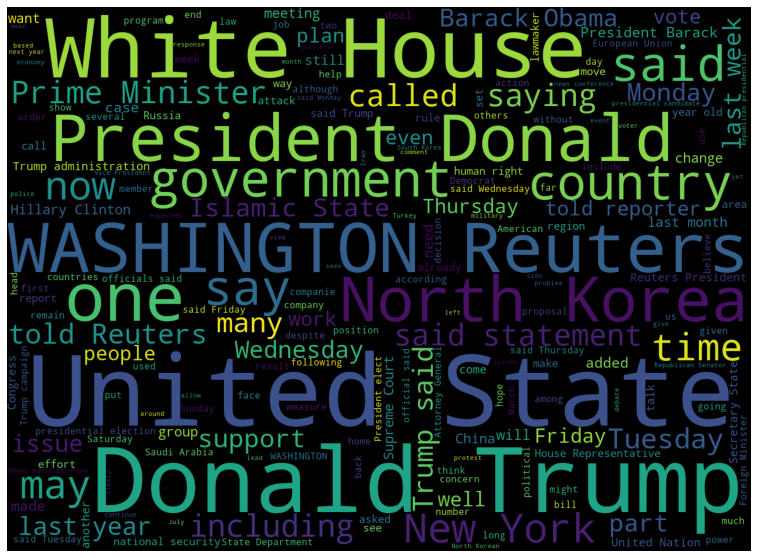

In [ ]:
# word cloud for the text real true News
text_true = pd.Series(df_fakenews_true['text'].tolist()).astype(str)

cloud = WordCloud(width=1300, height=950).generate(" ".join(text_true.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 1299.5, 949.5, -0.5)

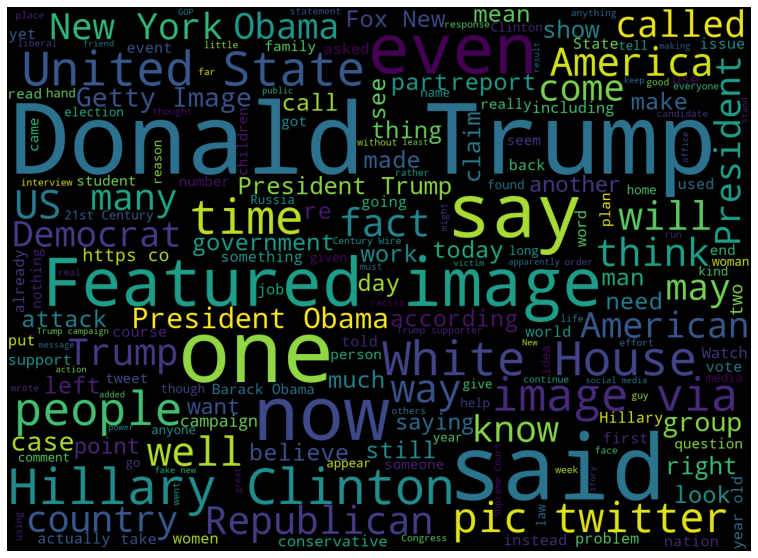

In [ ]:
# word cloud for the text false fake News
text_false = pd.Series(df_fakenews_fake['text'].tolist()).astype(str)

cloud = WordCloud(width=1300, height=950).generate(" ".join(text_false.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
# subsetting the cleaned, preprocessed news data for real and fake
top_words = clean_news.copy()
top_words_real = top_words[top_words['real/fake'] == 1]
top_words_fake = top_words[top_words['real/fake'] == 0]

We plotted the graph to count the word frequnecy in both real and fake news dataset. In the real news article, we found the word "said", "Trump", "US", "Would", "president" to be the most used. In the fake news articles, it is very similiar to real news but there were alot of words with "Trump" in it and we can tell that these news are mostly about Donald Trump and the preseidency.

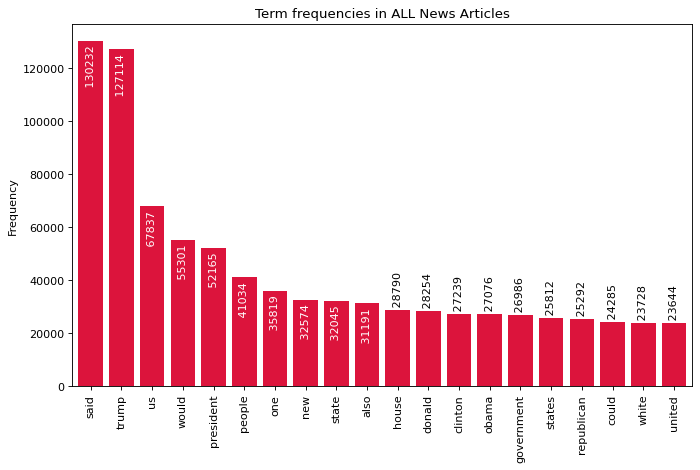

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)

cn = Counter(" ".join(top_words['content']).split())

y = [count for tag, count in cn.most_common(20)]
x = [tag for tag, count in cn.most_common(20)]

plt.bar(x, y, color='crimson')
plt.title("Term frequencies in ALL News Articles")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(cn.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
#plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

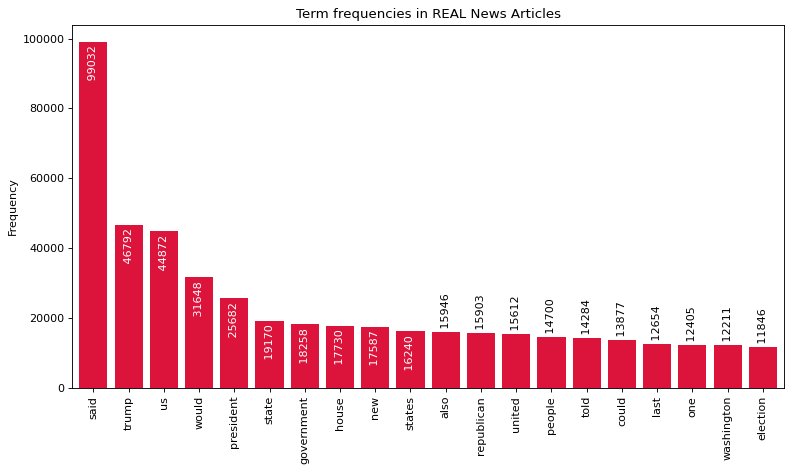

In [ ]:
figure(figsize=(10, 6), dpi=80)

cn = Counter(" ".join(top_words_real['content']).split())

y = [count for tag, count in cn.most_common(20)]
x = [tag for tag, count in cn.most_common(20)]

plt.bar(x, y, color='crimson')
plt.title("Term frequencies in REAL News Articles")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(cn.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

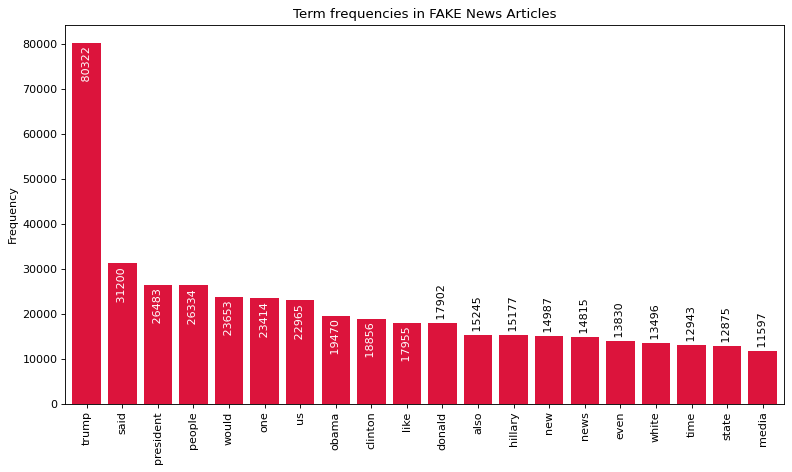

In [ ]:
figure(figsize=(10, 6), dpi=80)

cn = Counter(" ".join(top_words_fake['content']).split())

y = [count for tag, count in cn.most_common(20)]
x = [tag for tag, count in cn.most_common(20)]

plt.bar(x, y, color='crimson')
plt.title("Term frequencies in FAKE News Articles")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(cn.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

There are 23,471 fake news data and 21,417 real news data. Those of the data are labled as political news and world news. This explains the most used words are tend to related to the president and counteries.

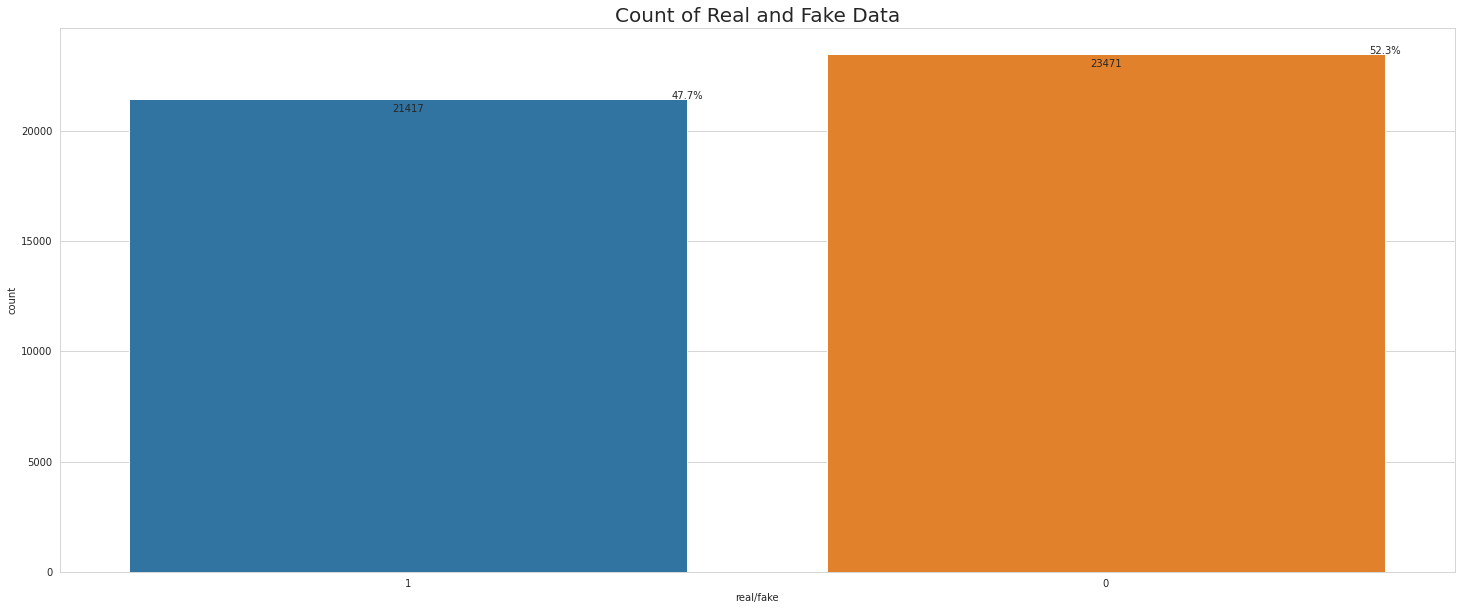

In [ ]:
total = float(len(news_data))

sns.set_style('whitegrid')
plt.figure(figsize= (25,10))
fig = sns.countplot(x='real/fake', data= news_data)
plt.title('Count of Real and Fake Data', fontsize=20)
for p in fig.patches:
    fig.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, -10), 
                   textcoords = 'offset points')
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    fig.annotate(percentage, (x, y),ha='center')

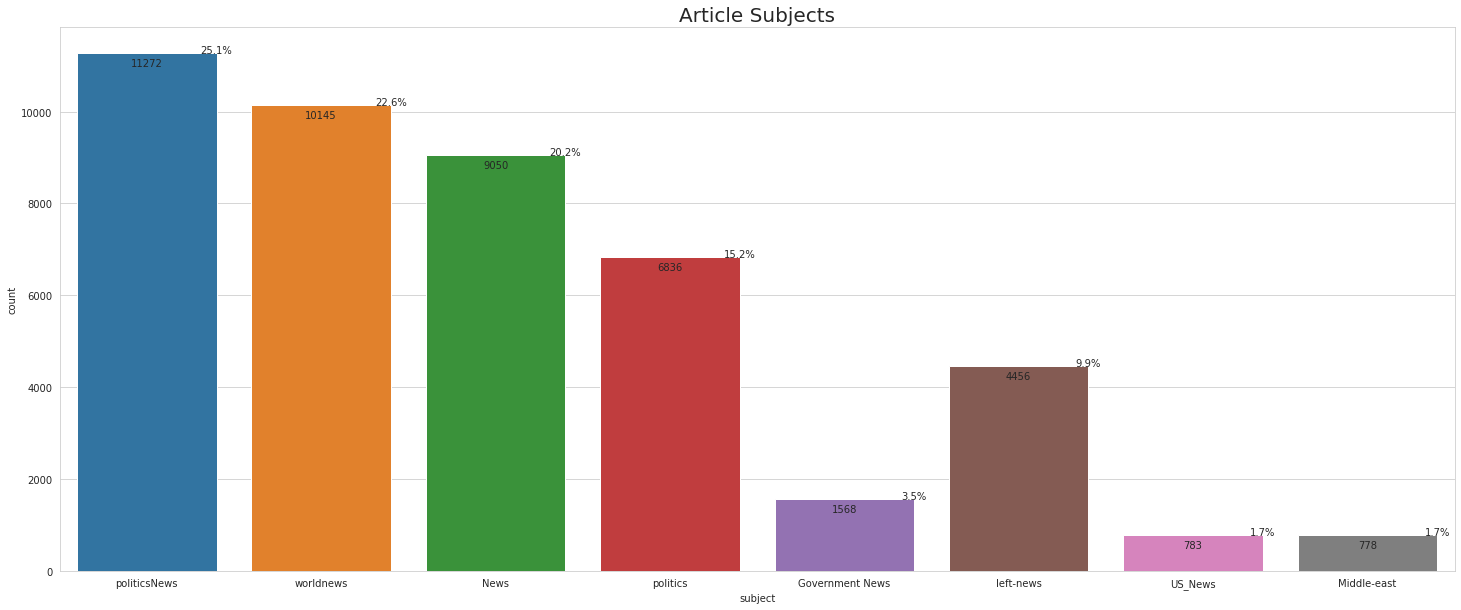

In [ ]:
#order=['unknown','Activated','Pending Activation','Inactivated','Non Standard MyChart Status','Patient Declined','Activation Code Generated, but Disabled']
total = float(len(news_data))


plt.figure(figsize= (25,10))
fig = sns.countplot(x='subject', data= news_data_all)
plt.title('Article Subjects', fontsize=20)
for p in fig.patches:
    fig.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, -10), 
                   textcoords = 'offset points')
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    fig.annotate(percentage, (x, y),ha='center')


In [ ]:
count = news_data_all.groupby(['subject','real/fake']).size().to_frame('count').sort_values(by='count', ascending=False).reset_index()
count

,subject,real/fake,count
0,politicsNews,1,11272
1,worldnews,1,10145
2,News,0,9050
3,politics,0,6836
4,left-news,0,4456
5,Government News,0,1568
6,US_News,0,783
7,Middle-east,0,778


In [ ]:
df_fakenews_true.groupby(['subject']).size().to_frame('count').sort_values(by='count', ascending=False).reset_index()

,subject,count
0,politicsNews,11272
1,worldnews,10145


In [ ]:
df_fakenews_fake.groupby(['subject']).size().to_frame('count').sort_values(by='count', ascending=False).reset_index()

,subject,count
0,News,9050
1,politics,6841
2,left-news,4459
3,Government News,1570
4,US_News,783
5,Middle-east,778


Time Serires Real/Fake News

In [ ]:
# looking at the publication date timespan of all articles
print(news_data_all['date'].min())
print(news_data_all['date'].max())

2015-03-31
2018-02-19


In [ ]:
df = news_data.groupby(['real/fake','date']).size().to_frame('count').reset_index()

In [ ]:
df.head()

,real/fake,date,count
0,0,2015-03-31,8
1,0,2015-04-01,2
2,0,2015-04-02,1
3,0,2015-04-04,5
4,0,2015-04-05,13


Based on the date count for the real and fake news, there are more count for real news between 2017 and 2018.

That date count for real news starts from 2016. There are more data collected over time for fake news than real news.

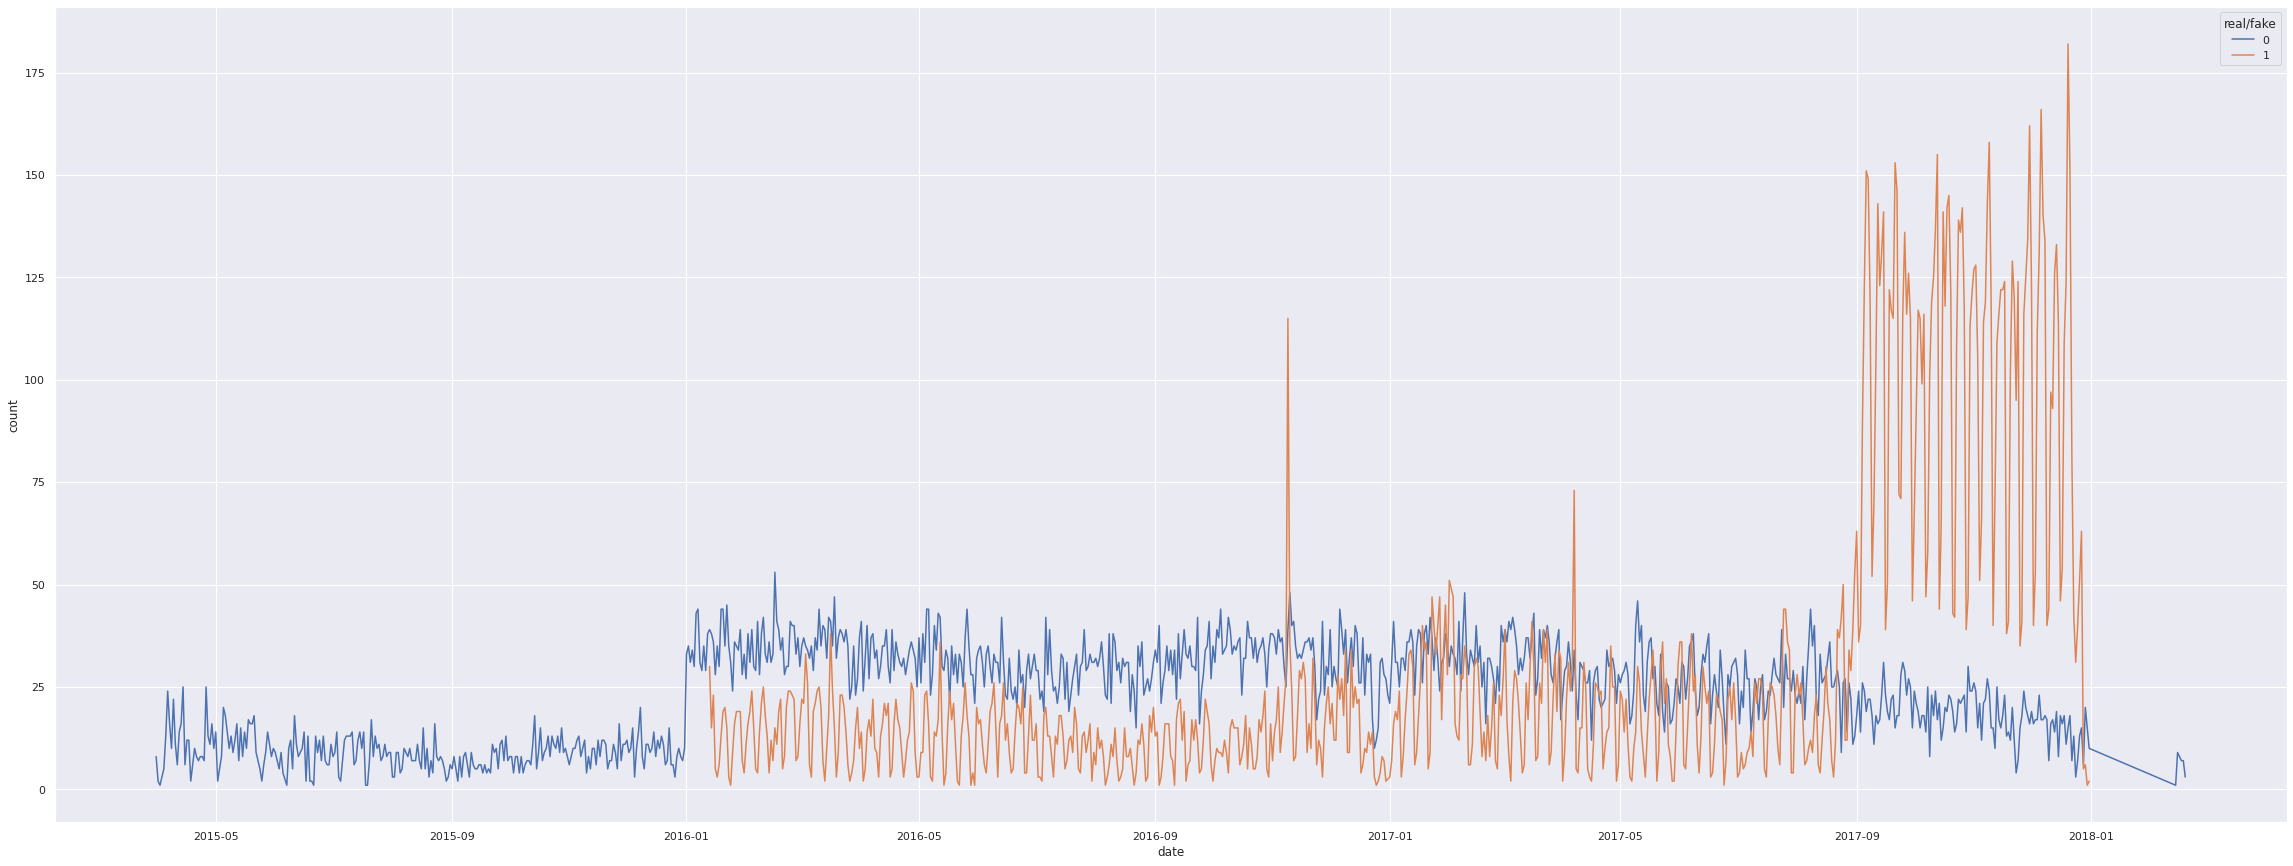

In [ ]:
sns.set(rc={'figure.figsize':(40,15)})
sns.lineplot(data=df, x='date', y='count', hue='real/fake')

In [ ]:
# resetting matplotlib to default
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

## 3.1 Sentimental Analysis 

In [ ]:
!pip install Afinn

In [ ]:
from afinn import Afinn

In [ ]:
#sentimental Analysis 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
afinn = Afinn()

In [ ]:
def sent_score(rev):
  return afinn.score(rev)

In [ ]:
clean_news.head(3)

,real/fake,date,content,title,text
0,1,2017-07-14,us government crackdown threatens kaspersky’s ...,us government crackdown threatens kaspersky’s ...,eugene kaspersky ceo russian cybersecurity sof...
1,1,2017-12-22,philippines coast guard rescues passengers cap...,philippines coast guard rescues passengers cap...,real philippines philippines coast guard said ...
2,0,2017-07-15,immigrant sorosfunded education earned million...,immigrant sorosfunded education earned million...,arlington woman arrested week charged four cou...


In [ ]:
clean_news_sent = clean_news.copy()

In [ ]:
# create a new column for sentiment scores
clean_news_sent['sentiment score'] = clean_news_sent.content.apply(sent_score)

[Text(0, 0, '-693.0'),
 Text(0, 0, '-563.0'),
 Text(0, 0, '-484.0'),
 Text(0, 0, '-454.0'),
 Text(0, 0, '-320.0'),
 Text(0, 0, '-319.0'),
 Text(0, 0, '-302.0'),
 Text(0, 0, '-283.0'),
 Text(0, 0, '-257.0'),
 Text(0, 0, '-252.0'),
 Text(0, 0, '-242.0'),
 Text(0, 0, '-236.0'),
 Text(0, 0, '-233.0'),
 Text(0, 0, '-228.0'),
 Text(0, 0, '-226.0'),
 Text(0, 0, '-215.0'),
 Text(0, 0, '-204.0'),
 Text(0, 0, '-203.0'),
 Text(0, 0, '-194.0'),
 Text(0, 0, '-183.0'),
 Text(0, 0, '-180.0'),
 Text(0, 0, '-178.0'),
 Text(0, 0, '-177.0'),
 Text(0, 0, '-174.0'),
 Text(0, 0, '-171.0'),
 Text(0, 0, '-170.0'),
 Text(0, 0, '-169.0'),
 Text(0, 0, '-167.0'),
 Text(0, 0, '-166.0'),
 Text(0, 0, '-163.0'),
 Text(0, 0, '-160.0'),
 Text(0, 0, '-157.0'),
 Text(0, 0, '-155.0'),
 Text(0, 0, '-154.0'),
 Text(0, 0, '-153.0'),
 Text(0, 0, '-152.0'),
 Text(0, 0, '-151.0'),
 Text(0, 0, '-148.0'),
 Text(0, 0, '-147.0'),
 Text(0, 0, '-146.0'),
 Text(0, 0, '-144.0'),
 Text(0, 0, '-143.0'),
 Text(0, 0, '-142.0'),
 Text(0, 0,

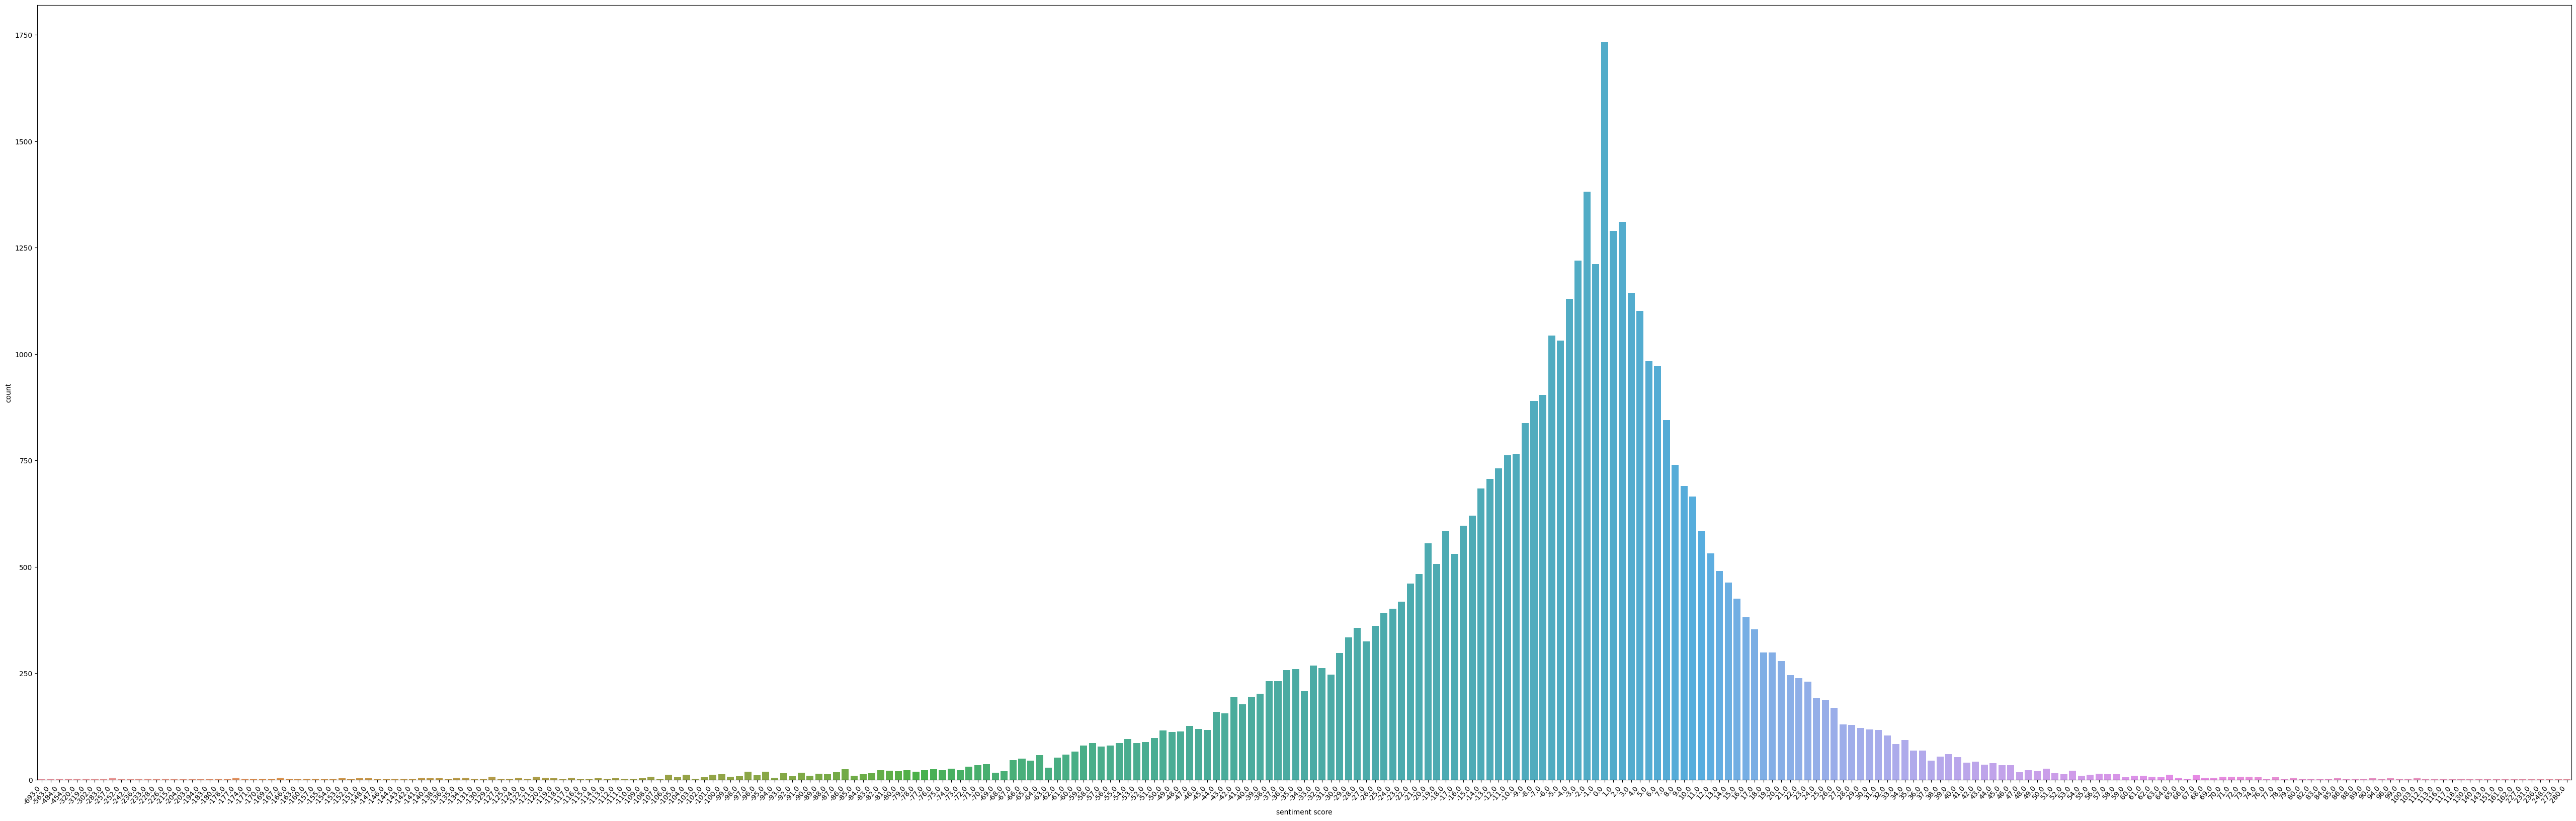

In [ ]:
#distribution of sentiment scores count 
plt.figure(figsize=(65,20))
ax = sns.countplot(x='sentiment score', data=clean_news_sent)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")

# **4. Neural Networks**

We decided to explore different types of models using different Embeddings to see which method would yield the highest result. First we used a stemming approach that. Following this, we used a Text Vectorization layer with to  compare three different Embeddings methodologies; 

1.   Textual Embeddings
2.   GloVe Embeddings
3.   Word2Vec Embeddings

We ran all these with a single input where we merged the 'title' and the 'text' of each article. To see whether or not we loose accuracy in the training by taking these together we created a multi-input Model taking the 'title' as one input and the 'text' of the article as another input.



## 4.1 Embeddings using Stemming

#### 4.1.1 Stemming

Going through a stemming process, which will group together the inflected forms of a word so they can be analyzed as a single item: the stem. 

In [28]:
# Feature extraction 'reviews' for processing
news_features = clean_news.copy()
news_features = news_features[['content']].reset_index(drop=True)
news_features.head()

,content
0,un official tied clintons set face trial found...
1,white house says expects bipartisan efforts co...
2,hillary issued devastating response trump’s pa...
3,white house says changes nsc trumps different ...
4,one heartbeat away…joe biden it’s ‘ok sometime...


In [ ]:
#Defining Stopwords
stop_words = set(stopwords.words("english"))

#Performing stemming on the review dataframe
ps = PorterStemmer()

#Splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['content'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news) # Getting the target variable

**Checking for avearge length of each Article**

Checking the ratio of observations in training to mean number of tokens per sample. We don't expect to get much value at all from a sequential text model in this case, because we would need a much bigger dataset.

In [ ]:
lengths = [len(x) for x in corpus]

print(f'The average article in our data has {np.mean(lengths)} words, and we have {len(clean_news)} samples.')
print(f'The ratio of samples to average sample length is thus {len(clean_news)/np.mean(lengths)}. We are nowhere close to 1500.')

The average article in our data has 1550.030453573338 words, and we have 44888 samples.
The ratio of samples to average sample length is thus 28.95943102054425. We are nowhere close to 1500.


One-Hot encoding for the embedding layers

In [ ]:
#Setting up vocabulary size
voc_size = 12000

#One hot encoding 
onehot_repr = [one_hot(words,voc_size)for words in corpus]

Padding embedded docs

In [ ]:
#Setting sentence length
sent_length = 100

#Padding the sentences
embedded_docs = pad_sequences(onehot_repr, padding = 'pre', maxlen = sent_length)
print(embedded_docs)

[[ 5926  4577  2755 ...  2564  4223   644]
 [11916  2420 11879 ...  3035  3761 11169]
 [ 1732  6934  4395 ...  8669  7749   384]
 ...
 [    0     0     0 ...  7656 11927  1962]
 [ 6319  2998  9754 ...  2611  8787 10167]
 [11806  6183  7988 ...  1510 11019  6149]]


Preparing the Data for our first Model

In [ ]:
# Defining the label column
label = clean_news['real/fake']

# Converting the text and label as array
text = np.asarray(embedded_docs).astype("float32")
label = np.asarray(label).astype("float32")

# Checking shape of X and y
text.shape,label.shape

((44888, 100), (44888,))

In [ ]:
# Taking 33% of the data for holdout as we have enough data for the model to train on 
holdout_split = int(len(label)*0.33)

In [ ]:
# defining train and test data
data_train = text[:holdout_split]
labels_train = label[:holdout_split]
data_test = text[holdout_split:]
labels_test = label[holdout_split:]

##### ***4.1.2 LSTM Model***

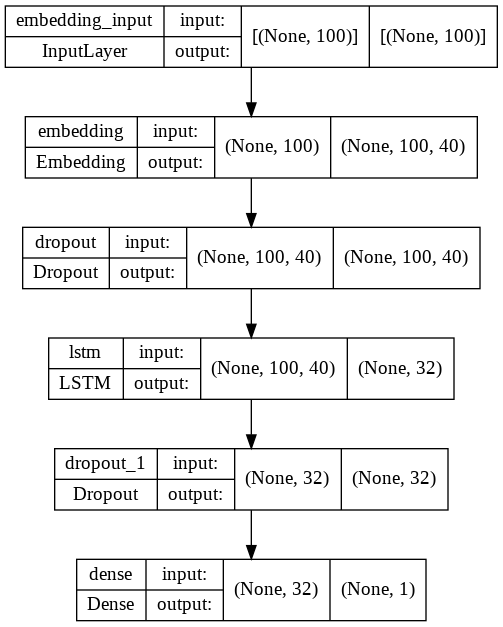

In [ ]:
# building a model
def build_model():

    embedding_vector_features=40

    model = keras.Sequential([
        keras.layers.Embedding(voc_size, embedding_vector_features, input_length=sent_length),
        keras.layers.Dropout(0.5),
        keras.layers.LSTM(32),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

    return model

model = build_model()
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
  # Displaying the model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 40)           480000    
                                                                 
 dropout (Dropout)           (None, 100, 40)           0         
                                                                 
 lstm (LSTM)                 (None, 32)                9344      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 489,377
Trainable params: 489,377
Non-trainable params: 0
_________________________________________________________________


Fitting the Model

In [ ]:
k = 2
num_validation_samples = len(data_train) // k
num_epochs = 10
batch_sizes = 100
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    model = build_model()
    history = model.fit(training_data, training_targets, 
                        validation_data = (validation_data,validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

Epoch 1/10
75/75 [==============================] - 4s 16ms/step - loss: 0.4980 - accuracy: 0.7810 - val_loss: 0.2285 - val_accuracy: 0.9218
Epoch 2/10
75/75 [==============================] - 1s 10ms/step - loss: 0.1552 - accuracy: 0.9522 - val_loss: 0.1523 - val_accuracy: 0.9430
Epoch 3/10
75/75 [==============================] - 1s 10ms/step - loss: 0.0828 - accuracy: 0.9768 - val_loss: 0.1417 - val_accuracy: 0.9486
Epoch 4/10
75/75 [==============================] - 1s 10ms/step - loss: 0.0414 - accuracy: 0.9911 - val_loss: 0.1595 - val_accuracy: 0.9465
Epoch 5/10
75/75 [==============================] - 1s 10ms/step - loss: 0.0244 - accuracy: 0.9959 - val_loss: 0.1989 - val_accuracy: 0.9415
Epoch 6/10
75/75 [==============================] - 1s 10ms/step - loss: 0.0221 - accuracy: 0.9953 - val_loss: 0.1632 - val_accuracy: 0.9442
Epoch 7/10
75/75 [==============================] - 1s 10ms/step - loss: 0.0133 - accuracy: 0.9981 - val_loss: 0.2088 - val_accuracy: 0.9399
Epoch 8/10
75

Plotting Model Performance and evaluating against Test Set

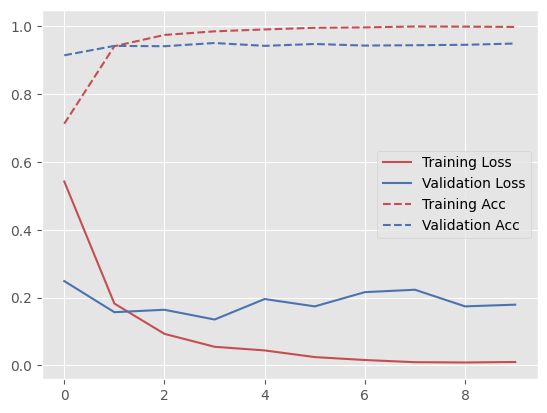

In [ ]:
plt.style.use('ggplot')

plt.plot(history.history['loss'],c="r")
plt.plot(history.history['val_loss'],c="b")
plt.plot(history.history['accuracy'],c="r",linestyle="--")
plt.plot(history.history['val_accuracy'],c="b",linestyle="--")
plt.legend(['Training Loss','Validation Loss','Training Acc','Validation Acc'])
plt.show()

**Evaluation of the model**

Let's see how we do on the holdout sample.

In [ ]:
model = build_model()
model.fit(data_train,labels_train,epochs=7,batch_size=100)

test_acc = model.evaluate(data_test,labels_test)[1]*100
print(f'The resulting model is about {test_acc:.2f}% accurate in the holdout sample.')

Epoch 1/7
149/149 [==============================] - 3s 6ms/step - loss: 0.3620 - accuracy: 0.8444
Epoch 2/7
149/149 [==============================] - 1s 6ms/step - loss: 0.1099 - accuracy: 0.9676
Epoch 3/7
149/149 [==============================] - 1s 7ms/step - loss: 0.0689 - accuracy: 0.9809
Epoch 4/7
149/149 [==============================] - 1s 6ms/step - loss: 0.0397 - accuracy: 0.9895
Epoch 5/7
149/149 [==============================] - 1s 6ms/step - loss: 0.0255 - accuracy: 0.9941
Epoch 6/7
149/149 [==============================] - 1s 7ms/step - loss: 0.0170 - accuracy: 0.9959
Epoch 7/7
940/940 [==============================] - 3s 3ms/step - loss: 0.1661 - accuracy: 0.9599
The resulting model is about 95.99% accurate in the holdout sample.


##### ***4.1.3 Bidirectional LSTM***

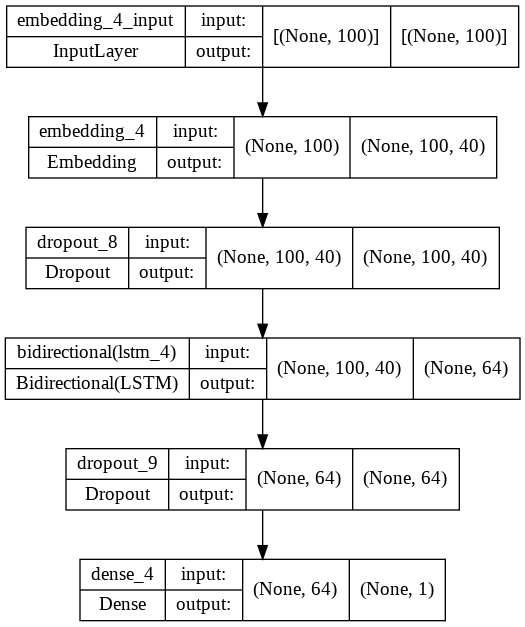

In [ ]:
# building a model
def build_model():

    embedding_vector_features=40

    model = keras.Sequential([
        keras.layers.Embedding(voc_size, embedding_vector_features, input_length=sent_length),
        keras.layers.Dropout(0.5),
        keras.layers.Bidirectional(keras.layers.LSTM(32)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

    return model

model = build_model()
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
k = 2
num_validation_samples = len(data_train) // k
num_epochs = 10
batch_sizes = 100
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    model = build_model()
    history = model.fit(training_data, training_targets, 
                        validation_data = (validation_data,validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

Epoch 1/10
75/75 [==============================] - 5s 25ms/step - loss: 0.5219 - accuracy: 0.7019 - val_loss: 0.2247 - val_accuracy: 0.8986
Epoch 2/10
75/75 [==============================] - 1s 15ms/step - loss: 0.1801 - accuracy: 0.9322 - val_loss: 0.1668 - val_accuracy: 0.9427
Epoch 3/10
75/75 [==============================] - 1s 15ms/step - loss: 0.1009 - accuracy: 0.9706 - val_loss: 0.1577 - val_accuracy: 0.9484
Epoch 4/10
75/75 [==============================] - 1s 15ms/step - loss: 0.0736 - accuracy: 0.9779 - val_loss: 0.1605 - val_accuracy: 0.9417
Epoch 5/10
75/75 [==============================] - 1s 16ms/step - loss: 0.0448 - accuracy: 0.9881 - val_loss: 0.2669 - val_accuracy: 0.9174
Epoch 6/10
75/75 [==============================] - 1s 16ms/step - loss: 0.0361 - accuracy: 0.9912 - val_loss: 0.1686 - val_accuracy: 0.9422
Epoch 7/10
75/75 [==============================] - 1s 15ms/step - loss: 0.0347 - accuracy: 0.9903 - val_loss: 0.2036 - val_accuracy: 0.9388
Epoch 8/10
75

Plotting Model Performance and evaluating against Test Set

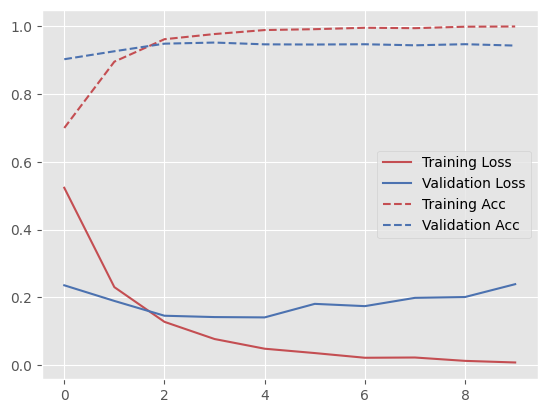

In [ ]:
plt.style.use('ggplot')

plt.plot(history.history['loss'],c="r")
plt.plot(history.history['val_loss'],c="b")
plt.plot(history.history['accuracy'],c="r",linestyle="--")
plt.plot(history.history['val_accuracy'],c="b",linestyle="--")
plt.legend(['Training Loss','Validation Loss','Training Acc','Validation Acc'])
plt.show()

In [ ]:
model = build_model()
model.fit(data_train,labels_train,epochs=7,batch_size=100)

test_acc = model.evaluate(data_test,labels_test)[1]*100
print(f'The resulting model is about {test_acc:.2f}% accurate in the holdout sample.')

Epoch 1/7
149/149 [==============================] - 5s 11ms/step - loss: 0.3363 - accuracy: 0.8466
Epoch 2/7
149/149 [==============================] - 2s 11ms/step - loss: 0.1194 - accuracy: 0.9612
Epoch 3/7
149/149 [==============================] - 2s 11ms/step - loss: 0.0674 - accuracy: 0.9785
Epoch 4/7
149/149 [==============================] - 2s 11ms/step - loss: 0.0440 - accuracy: 0.9866
Epoch 5/7
149/149 [==============================] - 2s 11ms/step - loss: 0.0287 - accuracy: 0.9922
Epoch 6/7
149/149 [==============================] - 2s 11ms/step - loss: 0.0242 - accuracy: 0.9931
Epoch 7/7
940/940 [==============================] - 5s 5ms/step - loss: 0.1168 - accuracy: 0.9578
The resulting model is about 95.78% accurate in the holdout sample.


## 4.2 Embeddings using Text Vectorization

Preparing the Data for the rest of our Models

In [32]:
# Defining label and variables and converting them to numpy
text = clean_news['content'].to_numpy()
label = clean_news['real/fake'].to_numpy()
text_text = clean_news['text'].to_numpy()
title = clean_news['title'].to_numpy()

# Checking shape of text and lable
text.shape,label.shape, text_text.shape, title.shape

((44888,), (44888,), (44888,), (44888,))

In [33]:
# Checking how much of the data to take out for the testing dataset (validation)
holdout_split = int(len(label)*0.33)

In [34]:
# defining train and test data
data_train = text[:holdout_split]
labels_train = label[:holdout_split]
data_test = text[holdout_split:]
labels_test = label[holdout_split:]

# For Multi-Layer Input
text_train = text_text[:holdout_split]
text_test = text_text[holdout_split:]
title_train = title[:holdout_split]
title_test = title[holdout_split:]

### 4.2.1 Text Vectorization

In [35]:
text_vectorization = keras.layers.TextVectorization(
    max_tokens=2000, # adding more tokens to allow for increase due to bigrams.
    output_mode="int", # This is requesting integer encodings (which means we'll have a sequence of integers)
)

text_vectorization.adapt(text)
text_vectorization.adapt(text_text)
text_vectorization.adapt(title)

Just to see what this layer is doing to the Articles... 

In [36]:
article_text = text[0]
print(f'ARTICLE TEXT: \n\n{article_text}')
article_len = len(article_text.split(' '))
print(f'REVIEW DETAILS: \n\nThe review contains roughly {article_len} words (based on white spaces).')
vectorized_article = text_vectorization(text)
print(f'It\'s vectorized (and padded) form contains {vectorized_article.shape[1]} tokens.\n') #Including the start index.
print(f'VECTOR REPRESENTATION:\n')
vectorized_article[0] # This text vectorization layer will convert a raw text vector into a sequence of integers.

ARTICLE TEXT: 

un official tied clintons set face trial found throat crushed barbell…un claims heart attack cause death vince foster part iithe death barbell disgraced un official john ashe could become bigger obsession conspiracy theorists vince foster suicideashe facing trial tax fraud died wednesday afternoon house westchester county un said heart attack local dobbs ferry police said thursday throat crushed presumably barbell dropped pumping ironashe due court monday chinese businessman codefendant ng lap seng charged smuggling million us since lying buy art casino chipsng identified senate report source hundreds thousands dollars illegally funneled arkansas restaurant owner charlie trie democratic national committee clinton administration ng charged crimeng trie visited white house several times democratic fundraising events photographed thenpresident bill clinton first lady hillary clintonone source told trial prosecutors would linked ashe clinton bagman ng would embarrassing dea

<tf.Tensor: shape=(4830,), dtype=int64, numpy=array([48, 88,  1, ...,  0,  0,  0])>

**Checking for avearge length of each Article**

Checking the ratio of observations in training to mean number of tokens per sample. We don't expect to get much value at all from a sequential text model in this case, because we would need a much bigger dataset.

In [37]:
lengths = [len(x) for x in vectorized_article]

print(f'The average review in our data has {np.mean(lengths)} words, and we have {len(clean_news)} samples.')
print(f'The ratio of samples to average sample length is thus {len(clean_news)/np.mean(lengths)}. We are nowhere close to 1500.')

The average review in our data has 4830.0 words, and we have 44888 samples.
The ratio of samples to average sample length is thus 9.293581780538302. We are nowhere close to 1500.


#### *4.2.2 Textual Embeddings*

We can pre-process the text using an Embedding layer, before going to LSTM, to 'help the model along.' The Embedding layer will be of shape Vocabular-Size x Vector Length (dimensionality of the latent space). We can feed these sequences of vectors into our LSTM. 

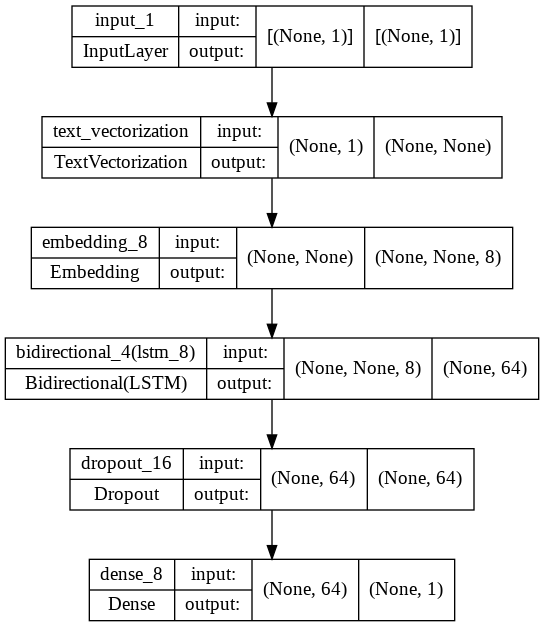

In [ ]:
def build_model_embed():
    inputs = keras.layers.Input(shape=(1), dtype="string") # We take our strings as input 
    processing = text_vectorization(inputs)
    
    # Truncates after 600 tokens, and pads up to 600 tokens for shorter reviews.
    # Mask zero means it will skip 0 tokens and will not pass them on.
    embedding = keras.layers.Embedding(input_dim=2000,output_dim=8,input_length=600, mask_zero=True)(processing)
    
    x = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding)
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs,outputs)
    model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
    return model

model_embed = build_model_embed()

keras.utils.plot_model(model_embed, show_shapes=True)

In [ ]:
model_embed.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding_8 (Embedding)     (None, None, 8)           16000     
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               10496     
 nal)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65    

Fit the model again... 

In [ ]:
k = 2
num_validation_samples = len(data_train) // k
num_epochs = 10
batch_sizes = 100
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    model = build_model_embed()
    history = model.fit(training_data, training_targets, 
                        validation_data = (validation_data,validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

Epoch 1/10
75/75 [==============================] - 20s 175ms/step - loss: 0.5568 - accuracy: 0.7003 - val_loss: 0.3875 - val_accuracy: 0.7467
Epoch 2/10
75/75 [==============================] - 11s 141ms/step - loss: 0.3351 - accuracy: 0.8534 - val_loss: 0.2551 - val_accuracy: 0.9066
Epoch 3/10
75/75 [==============================] - 11s 143ms/step - loss: 0.2302 - accuracy: 0.8936 - val_loss: 0.3296 - val_accuracy: 0.8509
Epoch 4/10
75/75 [==============================] - 11s 140ms/step - loss: 0.3365 - accuracy: 0.8707 - val_loss: 0.4165 - val_accuracy: 0.8195
Epoch 5/10
75/75 [==============================] - 11s 142ms/step - loss: 0.2709 - accuracy: 0.9129 - val_loss: 0.2076 - val_accuracy: 0.9236
Epoch 6/10
75/75 [==============================] - 11s 142ms/step - loss: 0.1878 - accuracy: 0.9392 - val_loss: 0.1614 - val_accuracy: 0.9459
Epoch 7/10
75/75 [==============================] - 11s 142ms/step - loss: 0.1536 - accuracy: 0.9444 - val_loss: 0.1443 - val_accuracy: 0.9581

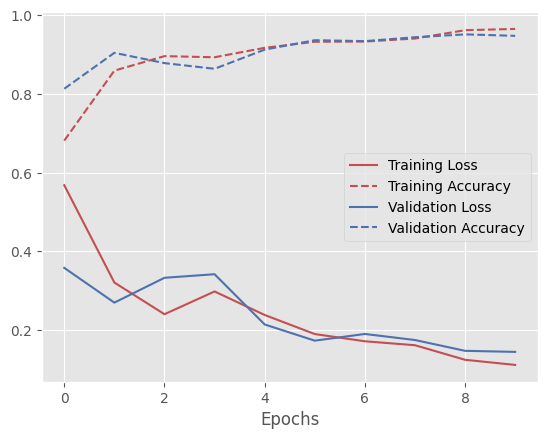

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

plt.plot(average_loss_history,c='r')
plt.plot(average_acc_history,c="r",linestyle="dashed")
plt.plot(average_val_loss_history,c='b')
plt.plot(average_val_acc_history,c='b',linestyle="dashed")
plt.xlabel("Epochs")
plt.legend(['Training Loss','Training Accuracy','Validation Loss','Validation Accuracy'])
plt.show()

And we evaluate again on the test data... the custom embedding layer gets us up to 87% accuracy on the holdout data in this case.

In [ ]:
model_embed = build_model_embed()
model_embed.fit(data_train,labels_train,epochs=7,batch_size=100)

test_acc = model_embed.evaluate(data_test,labels_test)[1]*100
print(f'The resulting model is about {test_acc:.2f}% accurate in the holdout sample.')

Epoch 1/7
149/149 [==============================] - 21s 97ms/step - loss: 0.4357 - accuracy: 0.7984
Epoch 2/7
149/149 [==============================] - 14s 97ms/step - loss: 0.2992 - accuracy: 0.8653
Epoch 3/7
149/149 [==============================] - 14s 96ms/step - loss: 0.2518 - accuracy: 0.9173
Epoch 4/7
149/149 [==============================] - 15s 98ms/step - loss: 0.1811 - accuracy: 0.9344
Epoch 5/7
149/149 [==============================] - 14s 97ms/step - loss: 0.2476 - accuracy: 0.9125
Epoch 6/7
149/149 [==============================] - 14s 97ms/step - loss: 0.1981 - accuracy: 0.9249
Epoch 7/7
940/940 [==============================] - 29s 28ms/step - loss: 0.1492 - accuracy: 0.9547
The resulting model is about 95.47% accurate in the holdout sample.


#### *4.2.3 GloVe Embeddings*

Let's see if we can use pre-trained GloVe embeddings to do better here. We will download the GloVe pre-trained embeddings (these are pre-trained embeddings from Wikipedia page data collected in 2014, as well as newswire data). Note that there are also GloVe embeddings that were trained from Twitter, which might be more appropriate for social media data: https://nlp.stanford.edu/projects/glove/

In [42]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2022-03-14 17:22:48--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-03-14 17:22:49--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-03-14 17:22:49--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

Note that there are about 1.2 million words in the English language. GloVe contains embeddings for about one third of those words (but that is going to cover most words you will encounter in regular usage!).

In [43]:
glove_file = "glove.6B.100d.txt" 
  
embeddings_index = {} 
with open(glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1) # Split off only the first element in the row, i.e., the word, keep the remaining values as the vector.
        coefs = np.fromstring(coefs, "f", sep=" ") # Convert the set of numeric values into a numpy array, splitting elements by ' '
        embeddings_index[word] = coefs # Populate our dictionary - for this word (key), the vector representation is this vector (value).
  
glove_vec_lengths = len(coefs)

print(f"Found {len(embeddings_index)} word vectors.")
print(f"GloVe vector representations are {glove_vec_lengths} elements long.")

Found 400000 word vectors.
GloVe vector representations are 100 elements long.


We will now construct the Embedding matrix. This is the mapping between word tokens (integer indices) in our data and their vector representations.

In [44]:
vocabulary = text_vectorization.get_vocabulary()
print(f"Recall that our vocabulary has {len(vocabulary)} tokens in it.")
print(f"Here is the 11th word in our vocabulary: {vocabulary[13]}.") # Recall that the first two indices are reserved for 'padding' and 'UNK'

Recall that our vocabulary has 2000 tokens in it.
Here is the 11th word in our vocabulary: president.


In [45]:
embedding_dim = glove_vec_lengths # The length of the vector representations; the latent embedding space will be in 100 dimensions. 

vocabulary = text_vectorization.get_vocabulary() # From the vocabulary our text vectorizer learned from our dataset, go over every word.
word_index = dict(zip(vocabulary, range(len(vocabulary)))) # Make a dictionary, key is word to value is index.

# Instantiate a matrix of values (these will be the 'weights' in our embedding layer)
embedding_matrix = np.zeros((len(vocabulary), embedding_dim)) # It will be the 2000 tokens by 100 (length of GloVe vectors)
for word, i in word_index.items():
    if i < len(vocabulary):
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Here is the GloVe vector embedding for 'room'
embedding_matrix[13]

array([-0.064549  , -0.13812   ,  0.50016999,  0.41433999,  0.45831999,
       -0.048331  , -0.21651   ,  0.34987   , -0.83235002, -0.62282002,
       -0.40099001, -0.31977999,  0.42928001, -0.026035  , -0.16170999,
       -0.32512999,  0.77604002, -0.39851999, -0.67013001, -0.55875999,
       -0.39862999, -0.28143001,  0.68614   ,  0.29229   , -0.71460003,
        0.36995   , -0.45309001, -0.23193   ,  0.76915997, -0.031589  ,
        1.06029999,  1.54460001, -0.13271999,  0.33701   , -0.97561002,
        0.73616999,  0.60841   ,  0.55800003, -0.39274001,  0.1121    ,
       -1.0474    , -0.03692   ,  0.99908   , -0.044925  , -0.41185999,
        0.19605   ,  0.093281  , -0.59622997, -0.60764998, -0.47420001,
       -0.30162001, -0.70128   , -0.20055   ,  0.99519002,  0.20088001,
       -2.56360006, -0.14627001,  0.77824003,  1.49129999,  0.29723999,
       -0.12084   , -0.060082  ,  0.079881  , -0.38348001,  0.41371   ,
       -0.41284001,  0.61702001,  1.13160002, -0.047434  ,  0.28

Now we use those vector representations to instantiate our Embedding layer. Rather than 'learning' the Embedding layer's weights, we will fix the weights to be the GloVe embeddings, and make them non-trainable. 

In [46]:
embedding_layer = layers.Embedding(
    len(vocabulary), # 2000 words.
    glove_vec_lengths, # Vectors of 100 elements per word.
    embeddings_initializer=keras.initializers.Constant(embedding_matrix), # Initialize with fixed values from our matrix.
    trainable=False, # These are weights, but they will be frozen so they don't update during training.
    mask_zero=True, # If we have a 0 token, for padding, we don't pass it through the layer.
)

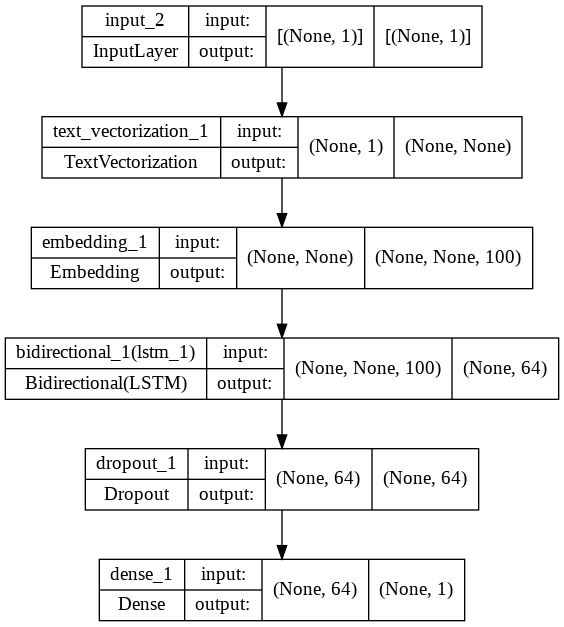

In [47]:
def build_model_GloVe():
    inputs = keras.layers.Input(shape=(1), dtype="string") # We take our strings as input 
    processing = text_vectorization(inputs)
    
    embedding = embedding_layer(processing)
    
    x = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding)
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(1, activation="sigmoid")(x)
    
    model = keras.Model(inputs,outputs)
    model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
    return model

model_GloVe = build_model_GloVe()

keras.utils.plot_model(model_GloVe, show_shapes=True)

In [49]:
model_GloVe.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, None, 100)         200000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               34048     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65  

And, once again, let's cross validate... 

In [ ]:
k = 2
num_validation_samples = len(data_train) // k
num_epochs = 10
batch_sizes = 100
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    model = build_model_GloVe()
    history = model.fit(training_data, training_targets, 
                        validation_data = (validation_data,validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

Epoch 1/10
75/75 [==============================] - 20s 177ms/step - loss: 0.3587 - accuracy: 0.8578 - val_loss: 0.2076 - val_accuracy: 0.9198
Epoch 2/10
75/75 [==============================] - 10s 136ms/step - loss: 0.1950 - accuracy: 0.9290 - val_loss: 0.1517 - val_accuracy: 0.9380
Epoch 3/10
75/75 [==============================] - 10s 138ms/step - loss: 0.1344 - accuracy: 0.9507 - val_loss: 0.1250 - val_accuracy: 0.9537
Epoch 4/10
75/75 [==============================] - 10s 137ms/step - loss: 0.1110 - accuracy: 0.9621 - val_loss: 0.1156 - val_accuracy: 0.9560
Epoch 5/10
75/75 [==============================] - 10s 137ms/step - loss: 0.1039 - accuracy: 0.9645 - val_loss: 0.0938 - val_accuracy: 0.9657
Epoch 6/10
75/75 [==============================] - 10s 136ms/step - loss: 0.0800 - accuracy: 0.9726 - val_loss: 0.1005 - val_accuracy: 0.9604
Epoch 7/10
75/75 [==============================] - 10s 135ms/step - loss: 0.0705 - accuracy: 0.9761 - val_loss: 0.0755 - val_accuracy: 0.9726

Plotting average loss over training once again... 

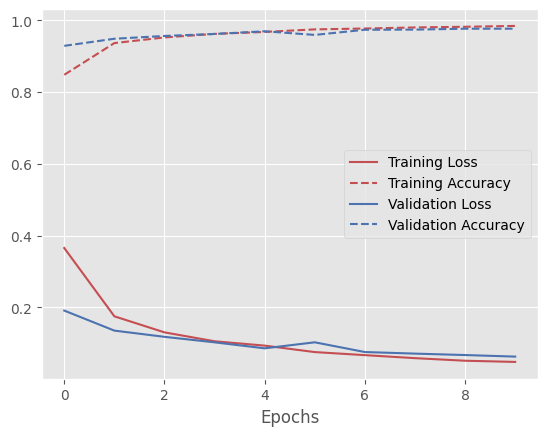

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

plt.plot(average_loss_history,c='r')
plt.plot(average_acc_history,c="r",linestyle="dashed")
plt.plot(average_val_loss_history,c='b')
plt.plot(average_val_acc_history,c='b',linestyle="dashed")
plt.xlabel("Epochs")
plt.legend(['Training Loss','Training Accuracy','Validation Loss','Validation Accuracy'])
plt.show()

And, performance on the holdout data? We are actually doing substantially worse using those generic GloVe embeddings.

In [ ]:
model_glove = build_model_GloVe()
model_glove.fit(data_train,labels_train,epochs=9,batch_size=100)

test_acc = model_glove.evaluate(data_test,labels_test)[1]*100
print(f'The resulting model is about {test_acc:.2f}% accurate in the holdout sample.')

Epoch 1/9
149/149 [==============================] - 20s 92ms/step - loss: 0.2508 - accuracy: 0.8985
Epoch 2/9
149/149 [==============================] - 14s 92ms/step - loss: 0.1099 - accuracy: 0.9606
Epoch 3/9
149/149 [==============================] - 13s 90ms/step - loss: 0.0807 - accuracy: 0.9721
Epoch 4/9
149/149 [==============================] - 14s 91ms/step - loss: 0.0641 - accuracy: 0.9778
Epoch 5/9
149/149 [==============================] - 14s 91ms/step - loss: 0.0639 - accuracy: 0.9772
Epoch 6/9
149/149 [==============================] - 14s 92ms/step - loss: 0.0443 - accuracy: 0.9857
Epoch 7/9
149/149 [==============================] - 14s 92ms/step - loss: 0.0360 - accuracy: 0.9876
Epoch 8/9
149/149 [==============================] - 14s 93ms/step - loss: 0.0317 - accuracy: 0.9893
Epoch 9/9
940/940 [==============================] - 27s 27ms/step - loss: 0.0405 - accuracy: 0.9867
The resulting model is about 98.67% accurate in the holdout sample.


#### *4.2.4 Word2Vec Embeddings*

Now we will try out the word2vec pre-trained embeddings (from Wikipedia). Let's download the English language, Wikipedia 100-dimensional embeddings. Note that this can take some time because the embedding file is large. 

In [29]:
!wget http://wikipedia2vec.s3.amazonaws.com/models/en/2018-04-20/enwiki_20180420_100d.pkl.bz2
!bzip2 -d enwiki_20180420_100d.pkl.bz2

--2022-03-14 17:07:36--  http://wikipedia2vec.s3.amazonaws.com/models/en/2018-04-20/enwiki_20180420_100d.pkl.bz2
Resolving wikipedia2vec.s3.amazonaws.com (wikipedia2vec.s3.amazonaws.com)... 52.219.9.41
Connecting to wikipedia2vec.s3.amazonaws.com (wikipedia2vec.s3.amazonaws.com)|52.219.9.41|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3514838671 (3.3G) [application/x-bzip2]
Saving to: ‘enwiki_20180420_100d.pkl.bz2’

enwiki_20180420_100 100%[===================>]   3.27G  22.6MB/s    in 2m 32s  

2022-03-14 17:10:08 (22.1 MB/s) - ‘enwiki_20180420_100d.pkl.bz2’ saved [3514838671/3514838671]



Now let's create an embedding matrix, as before, etc. Note, we can see that most of the words for which we lack embeddings are actually typos or proper nouns. We could manually fix the typos, or not (perhaps the typos are indicative of deceipt!

In [38]:
try:
  from wikipedia2vec import Wikipedia2Vec
except ImportError as error:
  !pip install wikipedia2vec
  from wikipedia2vec import Wikipedia2Vec

from wikipedia2vec import Wikipedia2Vec

# These embeddings are 100 dimensional also.
embedding_dim = 100

wiki2vec = Wikipedia2Vec.load('enwiki_20180420_100d.pkl')

vocabulary = text_vectorization.get_vocabulary() # From the vocabulary our text vectorizer learned from our dataset, go over every word.
word_index = dict(zip(vocabulary, range(len(vocabulary)))) # Make a dictionary, key is word to value is index.
embedding_matrix = np.zeros((len(vocabulary), embedding_dim))

for word, index in word_index.items():
    try:
        embedding_matrix[index] = wiki2vec.get_word_vector(f'{word}')
    except:
        print(f'Skipping {word}, no embedding for it.')
        continue

print(f'The embedding for \'room\' is {embedding_matrix[15]}.')

Skipping , no embedding for it.
Skipping [UNK], no embedding for it.
Skipping trump’s, no embedding for it.
Skipping –, no embedding for it.
Skipping obama’s, no embedding for it.
Skipping it’s, no embedding for it.
Skipping hillary’s, no embedding for it.
Skipping he’s, no embedding for it.
Skipping won’t, no embedding for it.
Skipping antitrump, no embedding for it.
Skipping don’t, no embedding for it.
Skipping here’s, no embedding for it.
Skipping can’t, no embedding for it.
Skipping “i, no embedding for it.
Skipping doesn’t, no embedding for it.
Skipping “the, no embedding for it.
Skipping didn’t, no embedding for it.
Skipping clinton’s, no embedding for it.
Skipping “we, no embedding for it.
Skipping she’s, no embedding for it.
Skipping they’re, no embedding for it.
Skipping ‘the, no embedding for it.
Skipping you’re, no embedding for it.
Skipping america’s, no embedding for it.
Skipping o’reilly, no embedding for it.
Skipping cnn’s, no embedding for it.
Skipping news’, no embeddi

And, again, let's make our embedding layer... 

In [39]:
embedding_layer = layers.Embedding(
    len(vocabulary), # 2000 words.
    100, # Vectors of 100 elements per word.
    embeddings_initializer=keras.initializers.Constant(embedding_matrix), # Initialize with fixed values from our matrix.
    trainable=False, # These are weights, but they will be frozen so they don't update during training.
    mask_zero=True, # If we have a 0 token, for padding, we don't pass it through the layer.
)

And we instantiate the model again... 

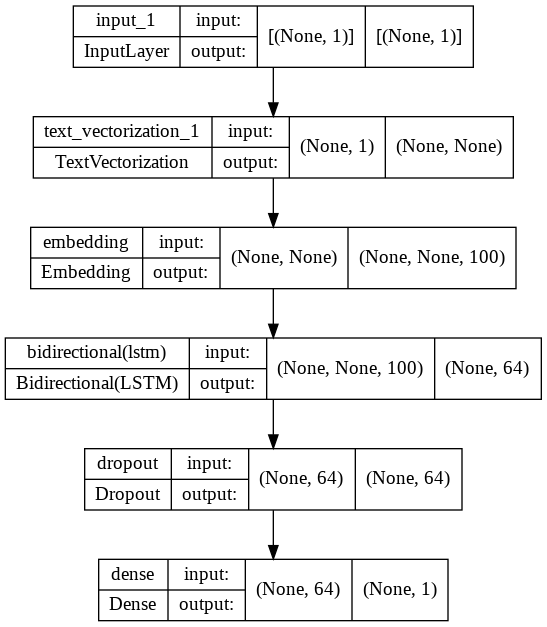

In [40]:
def build_model_word2vec():
    inputs = keras.layers.Input(shape=(1), dtype="string") # We take our strings as input 
    processing = text_vectorization(inputs)
    
    embedding = embedding_layer(processing)
    
    x = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding)
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(1, activation="sigmoid")(x)
    
    model = keras.Model(inputs,outputs)
    model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['accuracy'])
    return model

model_word2vec = build_model_word2vec()
keras.utils.plot_model(model_word2vec, show_shapes=True)

In [41]:
model_word2vec.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, None, 100)         200000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               34048     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65    

And, let's fit the model one last time... once again, these don't help! The embeddings actually hurt. 

In [ ]:
k = 2
num_validation_samples = len(data_train) // k
num_epochs = 10
batch_sizes = 100
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    model = build_model_word2vec()
    history = model.fit(training_data, training_targets, 
                        validation_data = (validation_data,validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

Epoch 1/10
75/75 [==============================] - 20s 168ms/step - loss: 0.3840 - accuracy: 0.8365 - val_loss: 0.2572 - val_accuracy: 0.8905
Epoch 2/10
75/75 [==============================] - 10s 138ms/step - loss: 0.2213 - accuracy: 0.9158 - val_loss: 0.2481 - val_accuracy: 0.8956
Epoch 3/10
75/75 [==============================] - 10s 137ms/step - loss: 0.1769 - accuracy: 0.9351 - val_loss: 0.1434 - val_accuracy: 0.9432
Epoch 4/10
75/75 [==============================] - 10s 139ms/step - loss: 0.1412 - accuracy: 0.9490 - val_loss: 0.1329 - val_accuracy: 0.9515
Epoch 5/10
75/75 [==============================] - 10s 139ms/step - loss: 0.1264 - accuracy: 0.9542 - val_loss: 0.1443 - val_accuracy: 0.9460
Epoch 6/10
75/75 [==============================] - 10s 137ms/step - loss: 0.1063 - accuracy: 0.9607 - val_loss: 0.1074 - val_accuracy: 0.9611
Epoch 7/10
75/75 [==============================] - 10s 135ms/step - loss: 0.0961 - accuracy: 0.9644 - val_loss: 0.1076 - val_accuracy: 0.9595

Plotting average model loss / accuracy across folds, over training.

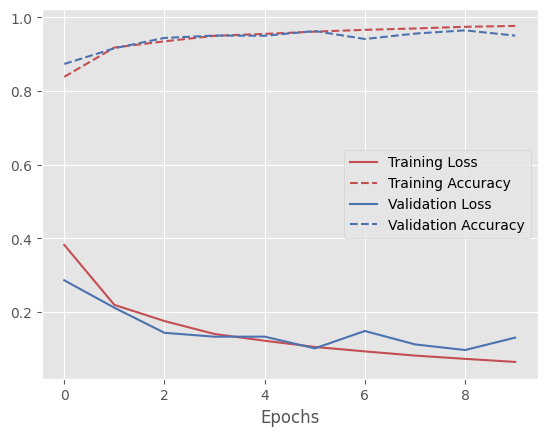

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

plt.plot(average_loss_history,c='r')
plt.plot(average_acc_history,c="r",linestyle="dashed")
plt.plot(average_val_loss_history,c='b')
plt.plot(average_val_acc_history,c='b',linestyle="dashed")
plt.xlabel("Epochs")
plt.legend(['Training Loss','Training Accuracy','Validation Loss','Validation Accuracy'])
plt.show()

And, again, performance on the holdout data, which is what ultimately matters? Again, performance of about 77%. These pre-trained embeddings are doing more harm than good in this setting.

In [ ]:
model_word2vec = build_model_word2vec()
model_word2vec.fit(data_train,labels_train,epochs=6,batch_size=100)

test_acc = model_word2vec.evaluate(data_test,labels_test)[1]*100
print(f'The resulting model is about {test_acc:.2f}% accurate in the holdout sample.')

Epoch 1/6
149/149 [==============================] - 21s 91ms/step - loss: 0.2926 - accuracy: 0.8811
Epoch 2/6
149/149 [==============================] - 14s 92ms/step - loss: 0.1545 - accuracy: 0.9411
Epoch 3/6
149/149 [==============================] - 14s 91ms/step - loss: 0.1164 - accuracy: 0.9591
Epoch 4/6
149/149 [==============================] - 14s 91ms/step - loss: 0.0943 - accuracy: 0.9662
Epoch 5/6
149/149 [==============================] - 14s 92ms/step - loss: 0.0782 - accuracy: 0.9714
Epoch 6/6
940/940 [==============================] - 27s 27ms/step - loss: 0.0615 - accuracy: 0.9785
The resulting model is about 97.85% accurate in the holdout sample.


## 4.3 Multi Input Embedding

We want to check how the model with two inputs as title and text separately will perform.

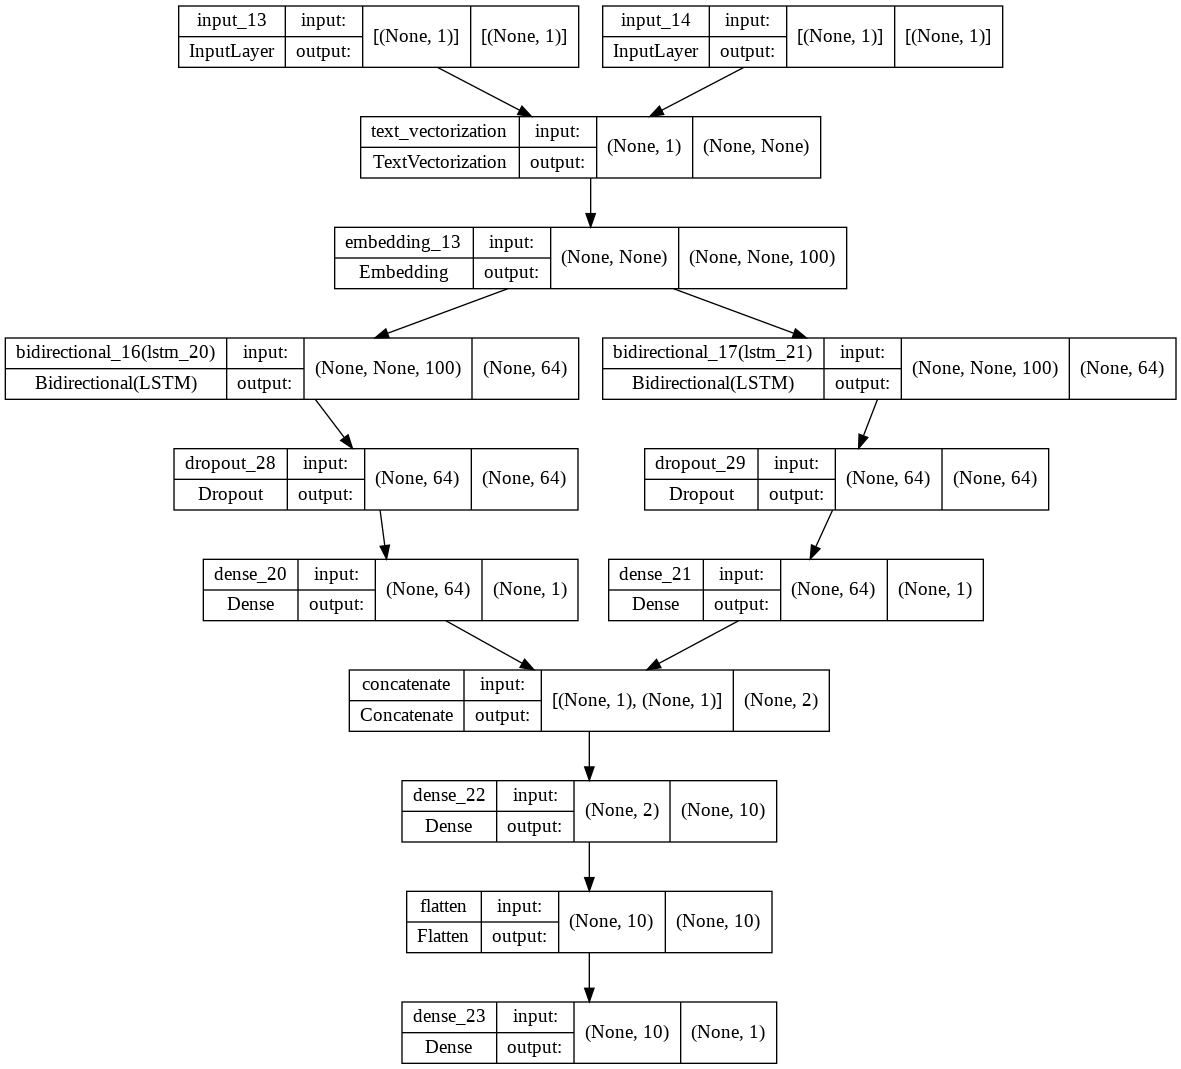

In [ ]:
def multi_input_model():

    input_1 = keras.layers.Input(shape=(1), dtype="string")
    input_2 = keras.layers.Input(shape=(1), dtype="string")

    processing_1 = text_vectorization(input_1)
    processing_2 = text_vectorization(input_2)

    embedding_1 = embedding_layer(processing_1)
    embedding_2 = embedding_layer(processing_2)

    x = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding_1)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(1, activation="sigmoid")(x)
    y = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding_2)
    y = keras.layers.Dropout(0.5)(y)
    y = keras.layers.Dense(1, activation="sigmoid")(y)

    concat_layer = layers.Concatenate()([x, y])

    dense_layer_3 = Dense(10, activation='sigmoid')(concat_layer)
    dense_layer_3 = layers.Flatten()(dense_layer_3)

    output = Dense(1, activation='sigmoid')(dense_layer_3)

    model = Model(inputs=[input_1, input_2], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    
    return model

multi_input_model = multi_input_model()
plot_model(multi_input_model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)



In [ ]:
multi_input_model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization (TextVector  (None, None)        0           ['input_13[0][0]',               
 ization)                                                         'input_14[0][0]']               
                                                                                                  
 embedding_13 (Embedding)       (None, None, 100)    200000      ['text_vectorization[12][0

In [ ]:
folds = 2
num_val_samples = len(data_train) // folds # floor division (i.e., round down to nearest integer.)
num_epochs = 10
batch_sizes = 100
# all_train_mae_histories, all_val_mae_histories = [],[]  
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

for i in range(folds): # the folds are going to be indexed 0 through 3 if k = 4
    print("Processing fold #:",i)
    
    val_data1 = text_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_data2 = title_train[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = labels_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data1 = np.concatenate(
        [text_train[:i * num_val_samples],
         text_train[(i + 1) * num_val_samples:]])

    partial_train_data2 = np.concatenate(
        [title_train[:i * num_val_samples],
         title_train[(i + 1) * num_val_samples:]])
    partial_train_targets = np.concatenate(
        [labels_train[:i * num_val_samples],
         labels_train[(i + 1) * num_val_samples:]])
    history = multi_input_model.fit(x=[partial_train_data1, partial_train_data2], y=partial_train_targets,
                        validation_data=([val_data1,val_data2], val_targets),
                        epochs=num_epochs, batch_size=batch_sizes)
    
    train_mae_history = history.history['acc']
    val_mae_history = history.history['val_acc']

    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

    average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
    average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
    average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
    average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]
    # all_train_mae_histories.append(train_mae_history)
    # all_val_mae_histories.append(val_mae_history)

# average_train_mae_history = [np.mean([x[i] for x in all_train_mae_histories]) for i in range(num_epochs)]
# average_val_mae_history = [np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]

Processing fold #: 0
Epoch 1/10
75/75 [==============================] - 243s 3s/step - loss: 0.6814 - acc: 0.6650 - val_loss: 0.6568 - val_acc: 0.8955
Epoch 2/10
75/75 [==============================] - 206s 3s/step - loss: 0.6345 - acc: 0.9037 - val_loss: 0.6112 - val_acc: 0.9391
Epoch 3/10
75/75 [==============================] - 211s 3s/step - loss: 0.5894 - acc: 0.9334 - val_loss: 0.5655 - val_acc: 0.9409
Epoch 4/10
75/75 [==============================] - 225s 3s/step - loss: 0.5429 - acc: 0.9398 - val_loss: 0.5185 - val_acc: 0.9544
Epoch 5/10
75/75 [==============================] - 207s 3s/step - loss: 0.4919 - acc: 0.9488 - val_loss: 0.4640 - val_acc: 0.9557
Epoch 6/10
75/75 [==============================] - 230s 3s/step - loss: 0.4382 - acc: 0.9511 - val_loss: 0.4113 - val_acc: 0.9541
Epoch 7/10
75/75 [==============================] - 233s 3s/step - loss: 0.3825 - acc: 0.9579 - val_loss: 0.3586 - val_acc: 0.9691
Epoch 8/10
75/75 [==============================] - 211s 3s/st

KeyError: ignored

## 4.4 Shaply (Feature Importance) 

Using SHAP to Understand Text Tokens' Effects in the Classifier

We are going to train a simple text classifier (using our data for the detection of fake reviews). For any given review classification, we can see which terms most contributed to the resulting classification.

In [ ]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
#tf.compat.v1.enable_eager_execution()

from tensorflow import keras
from keras import layers
from google.colab import files
import pandas as pd
import io
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


#### *4.4.1 Define / Train Our Fake News Detector*

In [ ]:
# Convert strings to sequences of words.
article_seq = []
for article in text:
  seq = keras.preprocessing.text.text_to_word_sequence(article)
  article_seq.append(seq)

# Make our dictionary of term frequencies
word_freq = {}
for article in article_seq:
  for term in article:
    try:
        word_freq[term] = word_freq[term]+1
    except KeyError:
        word_freq[term] = 1

unique_terms = {term for article in article_seq for term in article}
print(f'We have {len(unique_terms)} unique tokens in our dataset.')

# We can then easily make a term-integer dictionary and an integer-term dictionary (for reverse lookup)
word_index = {term: number for number, term in enumerate(unique_terms)}
reverse_index = {number: term for number, term in enumerate(unique_terms)}

We have 226054 unique tokens in our dataset.


In [ ]:
def vectorize_sequences(sequences, dimension=len(unique_terms)): 
    
    # Make our blank matrix of 0's to store hot encodings.
    results = np.zeros((len(sequences), dimension))

    # For each observation and element in that observation,
    # Update the blank matrix to a 1 at row obs, column element value.
    for i, sequence in enumerate(sequences):
        for term in sequence:
            j = word_index[term]
            results[i, j] = 1
    return results

ta_vectorized = vectorize_sequences(article_seq)

Note that SHAP requires that the input features be numeric (it can't work with strings). So, the input layer to our model needs to be integer sequences. 

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(750, activation="linear"),
        layers.Dense(50, activation="relu",kernel_regularizer="l2"),
        layers.Dense(5, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
    return model

model = build_model()

history = model.fit(ta_vectorized[:1200], label[:1200], validation_split=0.2, epochs=10, batch_size=25)

Test performance...

In [ ]:
test_perf = model.evaluate(ta_vectorized[1200:], label[1200:])
print(f'Accuracy in the test set is {test_perf[1]*100:.2f}%.')

#### *4.4.2 Create Our SHAP Explainer*

In [ ]:
try:
  import shap 
except ImportError as error:
  !pip install shap 
  import shap

# Use the first 1200 reviews as the basis of calculating shap values for any given prediction instance.
background = ta_vectorized[:1200]

# 'Adapt' the explainer to those reference samples, given our trained predictive model. 
explainer = shap.DeepExplainer(model, background)

In [ ]:
# We will produce shape values for the following observations.
test_obs = ta_vectorized[1250:1260]

# Third review is predicted to very likely be fake.
predictions = model.predict(test_obs)
print(f'Our predictions for these test observations are as follows:\n{predictions}')

shap_values = explainer.shap_values(test_obs)
print(f'We have {len(shap_values[0])} sets of SHAP values.')
print(f'The SHAP values for the first prediction instance are:\n {shap_values[0][0]}.')
print(f'Any given prediction yields {len(shap_values[0][0])} SHAP values; one for each of our {len(unique_terms)} unique terms.')

#### *4.4.3 Make a SHAP Force Plot*

Now, let's create the arrays of SHAP values and terms to pass into the plotting function.



In [ ]:
# Let's make one list with our terms that associate with each SHAP value, by index.
terms = np.stack(list(unique_terms))

# Now let's stack the lists of list of lists of prediction-specific SHAP values into a single NumPy array
shap_values = np.stack(np.stack(shap_values[0]))

Finally, let's create a plot. In this case, a Force plot.

In [ ]:
# initialize the JS visualization code
shap.initjs()

shap.force_plot(explainer.expected_value[0], shap_values[2], terms)

# 5. Conclusion

Below are the results obtained from different models and embeddings

1.   LSTM- 95.99%
2.   BI directional LSTM - 95.78%
3.   Textual Embedding - 95.47%
4.   GloVe Embedding - 98.67%
5.   Word2Vec Embedding - 97.85%

As GloVe embedding showed the highest accuracy, we decided to explore the embedding with a multi input model by using the title and text columns as two separate entities which showed an accuracy of xx%


In [ ]:
Make suggestions about things to explore going forward that may improve performance. 